# **Import data**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt 
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = pd.read_csv('/US_Accidents_June20.csv')

## **Data**


* For data cleaning, I printed out the missing value table, and clearly we 
can see that TMC, wind chill, precipitation, number, end lng and lat has a relatively large number of missing values, so for accuracy, I decided to drop those columns form the table.


In [10]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name','missing_count']
missing_df = missing_df.sort_values(by='missing_count')
print(missing_df)

              column_name  missing_count
0                      ID              0
34               Crossing              0
35               Give_Way              0
36               Junction              0
37                No_Exit              0
38                Railway              0
39             Roundabout              0
40                Station              0
41                   Stop              0
19                Country              0
42        Traffic_Calming              0
17                  State              0
16                 County              0
33                   Bump              0
14                   Side              0
43         Traffic_Signal              0
10           Distance(mi)              0
44           Turning_Loop              0
7               Start_Lng              0
6               Start_Lat              0
5                End_Time              0
4              Start_Time              0
3                Severity              0
1               

* , I used value_counts for a distribution of different level severity, the number 1 to 4 represent 4 level of severity where 1 indicates the least impact on traffic, and 4 indicates the most serious one. 

In [ ]:
print(df["Severity"].value_counts())

2    2373210
3     998913
4     112320
1      29174
Name: Severity, dtype: int64


In [9]:
import plotly.graph_objs as go
import plotly.offline as py
severity = df['Severity'].value_counts()

data = [go.Pie(labels=severity.index,
               values=severity.values,
               direction='clockwise')
       ]
layout = go.Layout(title='Severity of accidents',
                   width=600,
                   height=600                   
                  )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# Weather
Severe weather conditions may have various impacts on traffic, involving the impacts on vehicle performance, road conditions and driver’s conditions. These weather events can affect the transportation system both directly or indirectly, so in this section I mainly forced on the relationship between different weather condition and the severity level.
* Here are top 10 condition for overall accidents.


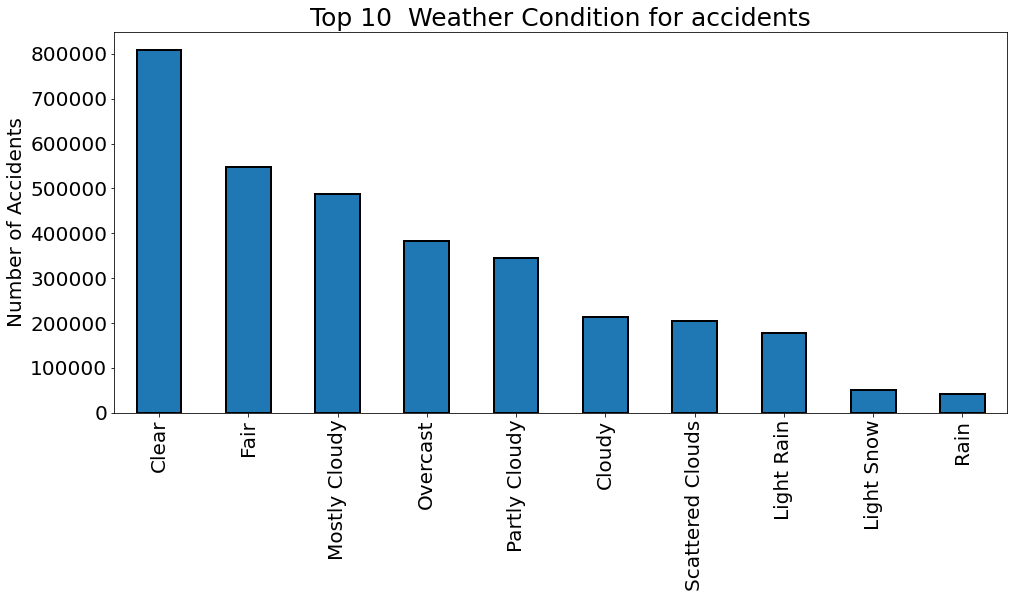

In [ ]:
fig, ax=plt.subplots(figsize=(16,7))
df['Weather_Condition'].value_counts().sort_values(ascending=False).head(10).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Top 10  Weather Condition for accidents',fontsize=25)
plt.ioff()

* 	Compare clear, rain, snow relation with severity, it’s clearly that condition under snow has the most proportion of level 3 and 4 accidents, possibly because of the slippery road.

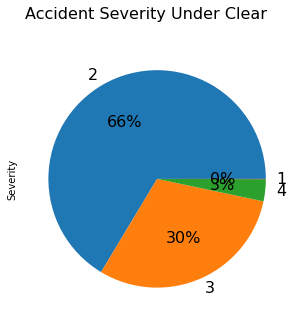

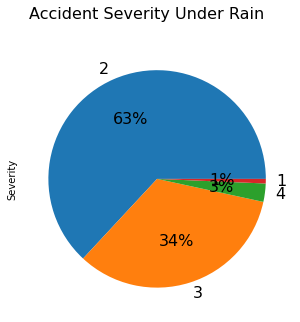

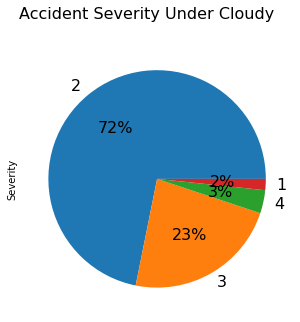

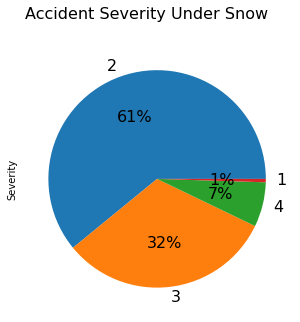

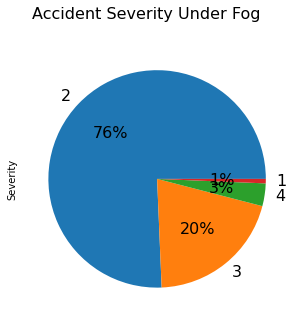

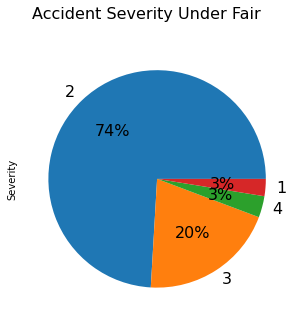

In [ ]:
for s in ["Clear","Rain","Cloudy","Snow","Fog"]:
    plt.subplots(figsize=(12,5)) 
    plt.suptitle('Accident Severity Under ' + s,fontsize=16)
    df.loc[df["Weather_Condition"] == s]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)

* 	Compare temperature and humidity, the graph shows the severity will goes up as the temperature decreasing,

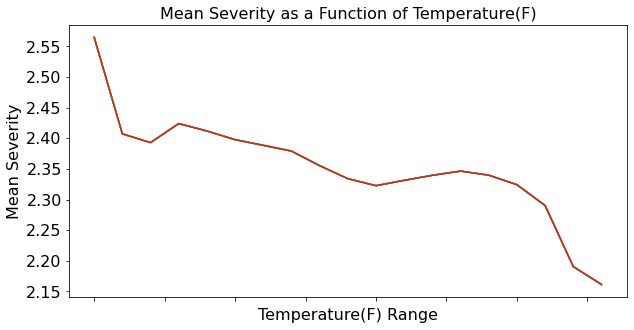

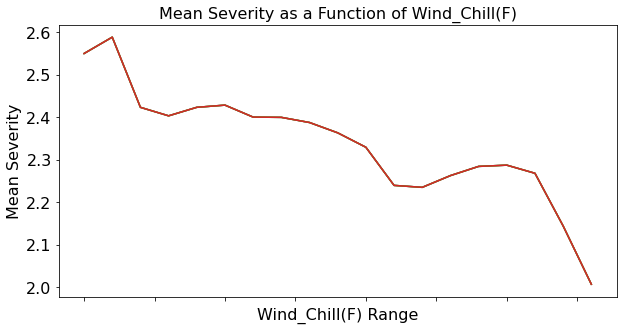

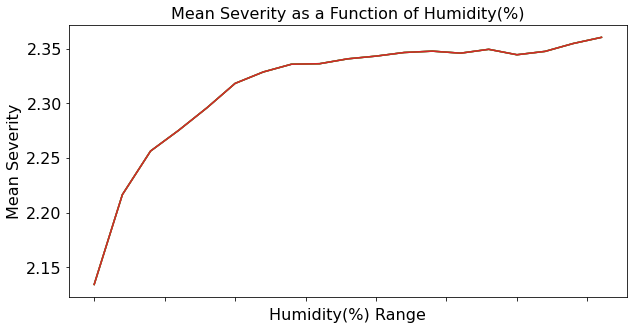

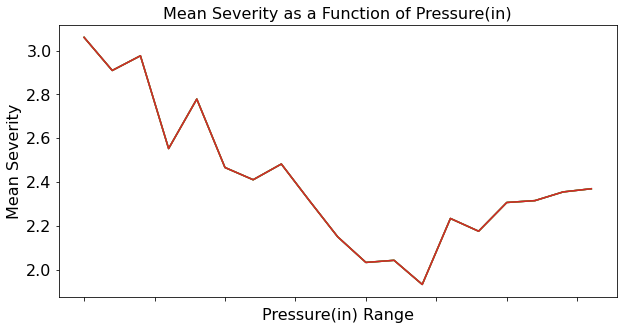

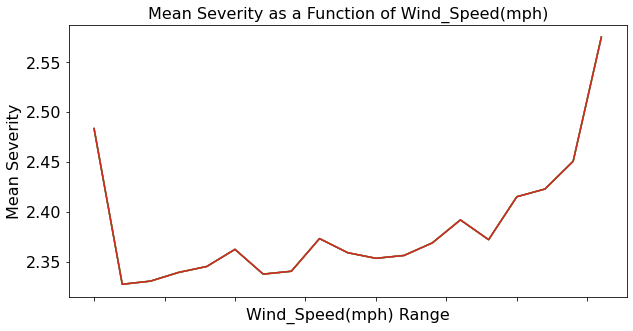

In [ ]:
factors = ['Temperature(F)','Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',  'Wind_Speed(mph)']

for factor in factors:
    factorMin = df[factor].quantile(q=0.0001)
    factorMax = df[factor].quantile(q=0.9999)
    plt.subplots(figsize=(10,5))
    for s in np.arange(1,5):
        df["Severity"].groupby(pd.cut(df[factor], np.linspace(factorMin,factorMax,num=20))).mean().plot()
        plt.title("Mean Severity as a Function of " + factor, fontsize=16)
        plt.xlabel(factor + " Range", fontsize=16)
        plt.ylabel("Mean Severity", fontsize=16)
        plt.xticks(fontsize=11)
        plt.yticks(fontsize=16)

# Place of accidents

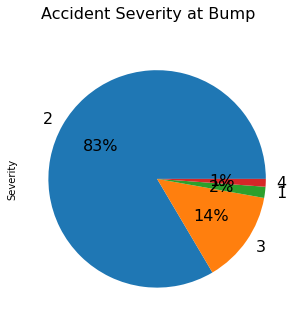

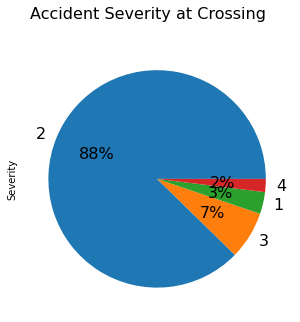

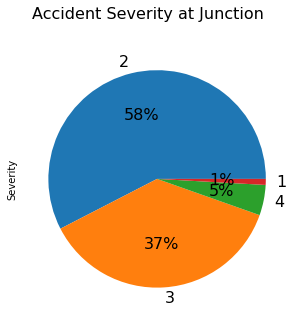

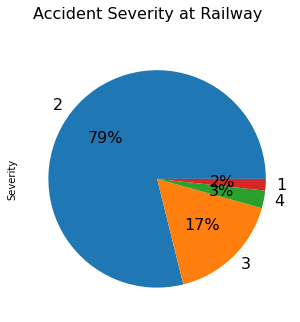

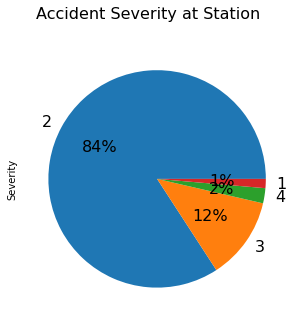

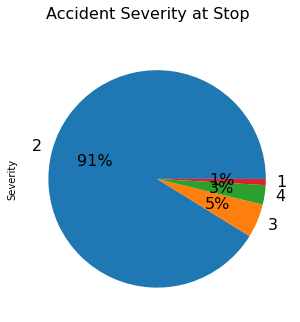

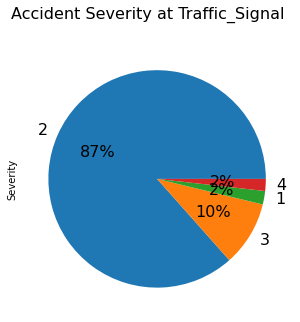

In [ ]:

for s in ['Bump', 'Crossing', 'Junction', 'Railway', 'Station', 'Stop', 'Traffic_Signal',]:  
    plt.subplots(figsize=(10,5)) 
    plt.suptitle('Accident Severity at '+ s,fontsize=16)
    df.loc[df[s] == True]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)

* From those graphs we can tells that at junction it’s more like will have a serious accidents.